In [1]:
import numpy as np
import pandas as pd
import glob
import math
import os 
from random import shuffle
import cv2
import pickle
from matplotlib import pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard

In [2]:
sampling_rate = 2048
gesture_size = 3072 #each gesture records 1.5 seconds
time_ms = (1/sampling_rate) * 1000 #sampling time in ms
nfft = 128 #window length -> 256 samples - 125 ms and 128 samples - 62.5ms
overlap = 112 #87.5% overlapping [128 - 112ms and 256 - 224ms]
zp =  0
T_sample = 1.5 #in seconds

data = []
IMAGE_WIDTH = 250
IMAGE_HEIGHT = 400

gesture_mapping = {'tick': 3,
                    'front_and_back': 2,
                    'up_and_down': 1,
                    'nothing': 0
                   }

In [3]:
path = r'D:\Education\TUM\master_thesis\data\sf2048_3072_1_5s\subset_pictures'                   
image_paths = os.listdir(path)
shuffle(image_paths)
print(image_paths)

['nothing-6.png', 'front_and_back-6.png', 'up_and_down-2.png', 'nothing-8.png', 'front_and_back-2.png', 'up_and_down-1.png', 'nothing-10.png', 'nothing-9.png', 'nothing-2.png', 'up_and_down-7.png', 'tick-6.png', 'front_and_back-9.png', 'up_and_down-4.png', 'front_and_back-3.png', 'tick-5.png', 'front_and_back-5.png', 'front_and_back-1.png', 'tick-7.png', 'tick-8.png', 'tick-4.png', 'nothing-4.png', 'front_and_back-7.png', 'tick-2.png', 'nothing-1.png', 'tick-9.png', 'up_and_down-8.png', 'front_and_back-4.png', 'front_and_back-8.png', 'up_and_down-9.png', 'up_and_down-5.png', 'up_and_down-10.png', 'tick-1.png', 'up_and_down-3.png', 'nothing-5.png', 'up_and_down-6.png', 'tick-10.png', 'tick-3.png', 'front_and_back-10.png', 'nothing-3.png', 'nothing-7.png']


In [6]:
def label_int(word_label):
    label = gesture_mapping[word_label]
    label_arr = np.zeros(4)
    label_arr[label] = 1
    return label_arr

In [7]:
for img in image_paths:
    word_label = img.split('-')[0]
    label = label_int(word_label)
    img_path = os.path.join(path, img)
    image = cv2.imread(img_path)
    #image = cv2.resize(image, (IMAGE_HEIGHT, IMAGE_WIDTH))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = image.astype('float') / 255.0
    data.append([image, label])
       

In [8]:
print(len(data))
input_shape = image.shape   
print(input_shape)

40
(288, 432, 3)


[0. 0. 1. 0.]


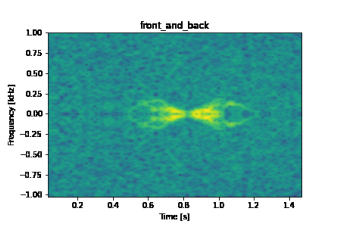

In [16]:
plt.imshow(data[15][0])
plt.axis('off')

print(data[15][1])